In [1]:
import os
import glob
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sf

import tensorflow as tf
import sklearn.model_selection as skms

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import InputLayer
from keras import backend as K
from keras.layers import Activation, Dense
from keras.utils import np_utils
import keras.optimizers as optimizers

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys
sys.path.append("./fmp")
from util import *
import fmp

Using TensorFlow backend.


## Tensorflow (Keras) CNN Model

In [2]:
BATCH_SIZE = 128
EPOCHS = 20
ONE_HOT_SHAPE = 10

checkpoint_path = "./checkpoints/cnn2_cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # Save weights, every 5-epochs.
    period=5)

# CNN model from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
def cnn2_model():
    # create model
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(1, 128, 128), data_format = 'channels_first'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dense(ONE_HOT_SHAPE))
    model.add(BatchNormalization())
    model.add(Activation("sigmoid"))

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
        metrics=['acc'])
    return model

In [3]:
model = cnn2_model()
model.load_weights('./checkpoints/cnn2_checkpoint_complete')

## Training Results

Train on 5216 samples, validate on 652 samples
Epoch 1/20
 - 182s - loss: 0.6650 - acc: 0.6356 - val_loss: 1.4264 - val_acc: 0.7397
Epoch 2/20
 - 179s - loss: 0.5730 - acc: 0.7528 - val_loss: 0.7469 - val_acc: 0.6906
Epoch 3/20
 - 178s - loss: 0.5293 - acc: 0.8150 - val_loss: 0.6868 - val_acc: 0.7097
Epoch 4/20
 - 178s - loss: 0.4980 - acc: 0.8612 - val_loss: 0.6148 - val_acc: 0.6581
Epoch 5/20
 - 177s - loss: 0.4708 - acc: 0.8937 - val_loss: 0.5323 - val_acc: 0.7702

Epoch 00005: saving model to ./checkpoints/cnn2_cp-0005.ckpt
Epoch 6/20
 - 177s - loss: 0.4482 - acc: 0.9160 - val_loss: 0.4950 - val_acc: 0.8245
Epoch 7/20
 - 177s - loss: 0.4270 - acc: 0.9328 - val_loss: 0.6320 - val_acc: 0.6776
Epoch 8/20
 - 177s - loss: 0.4083 - acc: 0.9452 - val_loss: 0.5055 - val_acc: 0.7785
Epoch 9/20
 - 178s - loss: 0.3894 - acc: 0.9582 - val_loss: 0.5066 - val_acc: 0.8080
Epoch 10/20
 - 178s - loss: 0.3724 - acc: 0.9652 - val_loss: 0.4354 - val_acc: 0.8765

Epoch 00010: saving model to ./checkpoints/cnn2_cp-0010.ckpt
Epoch 11/20
 - 178s - loss: 0.3566 - acc: 0.9702 - val_loss: 0.4155 - val_acc: 0.8986
Epoch 12/20
 - 178s - loss: 0.3412 - acc: 0.9761 - val_loss: 0.3872 - val_acc: 0.9580
Epoch 13/20
 - 179s - loss: 0.3268 - acc: 0.9805 - val_loss: 0.3769 - val_acc: 0.9192
Epoch 14/20
 - 179s - loss: 0.3133 - acc: 0.9835 - val_loss: 0.3413 - val_acc: 0.9566
Epoch 15/20
 - 179s - loss: 0.3020 - acc: 0.9848 - val_loss: 0.3412 - val_acc: 0.9492

Epoch 00015: saving model to ./checkpoints/cnn2_cp-0015.ckpt
Epoch 16/20
 - 177s - loss: 0.2903 - acc: 0.9868 - val_loss: 0.3183 - val_acc: 0.9581
Epoch 17/20
 - 176s - loss: 0.2780 - acc: 0.9897 - val_loss: 0.3111 - val_acc: 0.9681
Epoch 18/20
 - 177s - loss: 0.2674 - acc: 0.9915 - val_loss: 0.3049 - val_acc: 0.9603
Epoch 19/20
 - 176s - loss: 0.2568 - acc: 0.9927 - val_loss: 0.2842 - val_acc: 0.9716
Epoch 20/20
 - 177s - loss: 0.2486 - acc: 0.9924 - val_loss: 0.2537 - val_acc: 0.9885

Epoch 00020: saving model to ./checkpoints/cnn2_cp-0020.ckpt
CNN Error: 1.15%

In [4]:
# Load Data

#../../6.S198/6S198
PATH = os.path.abspath('.') #os.path.abspath(os.path.join('..', 'input'))
print(PATH)

#../../6.S198/TIDIGITS/tidigits_comp/data
DATA_PATH = os.path.join(PATH, '..', 'TIDIGITS', 'tidigits_flac', 'data')
print(DATA_PATH)

def loadFiles():
    subpaths_1 = ['adults', 'children']
    subpaths_2 = ['test', 'train']
    file_ext = '.flac'#'.wav'

    # Generate list of samples
    samples = []
    for subpath_1 in subpaths_1:
        for subpath_2 in subpaths_2:
            for subpath_3 in os.listdir(os.path.join(DATA_PATH, subpath_1, subpath_2)):
                if not os.path.isdir(os.path.join(DATA_PATH, subpath_1, subpath_2, subpath_3)):
                    continue
                for subpath_voice in os.listdir(os.path.join(DATA_PATH, subpath_1, subpath_2, subpath_3)):
                    if not os.path.isdir(os.path.join(DATA_PATH, subpath_1, subpath_2, subpath_3, subpath_voice)):
                        continue
                    subpath = os.path.join(subpath_1, subpath_2, subpath_3, subpath_voice)
                    for sample in os.listdir(os.path.join(DATA_PATH, subpath_1, subpath_2, subpath_3, subpath_voice)):
                        sample_name = sample[:-len(file_ext)]
                        sample_path = os.path.join(subpath_1, subpath_2, subpath_3, subpath_voice, sample)
                        if len(sample_name) == 2 and sample_name[0].isdigit():
                            samples.append((sample_name, sample_path))
                        elif len(sample_name) == 2 and sample_name[0]=='z':
                            samples.append((sample_name, sample_path))

    return samples

/Users/timothy/Documents/MIT/2018_Fall/6.S198/6S198
/Users/timothy/Documents/MIT/2018_Fall/6.S198/6S198/../TIDIGITS/tidigits_flac/data


In [5]:
#s = loadFiles()
#countSamples(s)

In [6]:
def samples_to_spectrograms(samples, mag=True, log=False, plot=False):
    spectrograms = []
    labels = []
    paths = []
    for i, (name, path) in enumerate(samples):
        # Create Spectrogram
        sample_path = os.path.join(DATA_PATH, path)
        snd, fs = sf.read(sample_path)
        f, t, snd_stft = sp.signal.stft(snd, fs=fs)
        if mag:
            snd_stft = np.abs(snd_stft)
            if log:
                snd_stft = np.log(snd_stft)
        if plot:
            plt.figure()
            #plt.pcolormesh(t, f, snd_stft)
            plt.pcolormesh(range(snd_stft.shape[1]), range(snd_stft.shape[0]), snd_stft)
        spectrograms.append(snd_stft)
        
        # Create Label
        if name[:-1].isdigit():
            labels.append(int(name[:-1]))
        elif name[:-1]=='z':
            labels.append(int(0))
        else:
            print("FATAL ERROR: DATA should not have " + str(name))
        
        # Create file-path (for playback)
        paths.append(sample_path)
    return spectrograms, labels, paths

def trim_spectrograms(spectrograms, shape=(128, 128), pad=(0,20), plot=False):
    # Hardcoded trim
    trimmed = []
    for spec in spectrograms:
        spec_zp = np.zeros(shape)
        spec_trim = spec[pad[0]:pad[0]+shape[0], pad[1]:pad[1]+shape[1]]
        spec_zp[:spec_trim.shape[0], :spec_trim.shape[1]] = spec_trim
        trimmed.append(spec_zp)
    if plot:
        for spec in trimmed:
            plt.figure()
            plt.pcolormesh(range(spec.shape[1]), range(spec.shape[0]), spec)
            plt.colorbar()
    return trimmed

def create_dataset():
    s = loadFiles()
    x, y, paths = samples_to_spectrograms(s)
    x = trim_spectrograms(x)
    return x, y, paths

In [7]:
# Demo Data

x, y, paths = create_dataset()

## Test TIDIGIT Classification

In [42]:
# Test Demo Data

@interact(IDX=widgets.IntSlider(min=0,max=len(x),step=1,value=10))
def demo(IDX=np.random.randint(0, len(x))):
    print("IDX:       " + str(IDX))
    print("\nLabel:     " + str(y[IDX]))
    snd, fs = sf.read(paths[IDX])

    test_images = np.array([x[IDX]])
    test_labels = np.array([y[IDX]])
    test_images = test_images.reshape(test_images.shape[0], 1, 128, 128).astype('float32')
    
    # Create prediction
    predictions = model.predict(test_images)
    
    img = test_images[0][0]
    target_class = None
    correct_class = test_labels[0]

    # Display image (courtesy of Anish Athalye)
    plt.figure();
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.sca(ax1)
    p = predictions[0]
    ax1.imshow(img, origin='lower')
    fig.sca(ax1)

    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)
    
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')

    tidigit_labels = ['0','1','2','3','4','5','6','7','8','9']

    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10), [tidigit_labels[i][:15] for i in topk])
    fig.subplots_adjust(bottom=0.2)
    
    print("Predicted: " + str(tidigit_labels[topk[0]]))

    return Audio(snd, rate=fs);

interactive(children=(IntSlider(value=10, description='IDX', max=6520), Output()), _dom_classes=('widget-inter…

## Record your own demo

In [9]:
#os.system("open -a /Applications/Adobe\ Audition\ CC\ 2017/Adobe\ Audition\ CC\ 2017")

In [10]:
def demo_query(snd):
    snd, fs = sf.read("./tmp/query.flac")
    f, t, snd_stft = sp.signal.stft(snd, fs=fs)
    snd_stft = np.abs(snd_stft)
    
    shape=(128, 128)
    pad=(0,20)
    spec_zp = np.zeros(shape)
    spec_trim = snd_stft[pad[0]:pad[0]+shape[0], pad[1]:pad[1]+shape[1]]
    spec_zp[:spec_trim.shape[0], :spec_trim.shape[1]] = spec_trim
    snd_stft = spec_zp

    test_images = np.array([snd_stft])
    test_labels = np.array([None])
    test_images = test_images.reshape(test_images.shape[0], 1, 128, 128).astype('float32')
    
    # Create prediction
    predictions = model.predict(test_images)
    
    img = test_images[0][0]
    target_class = None
    correct_class = None

    # Display image (courtesy of Anish Athalye)
    plt.figure();
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    fig.sca(ax1)
    p = predictions[0]
    ax1.imshow(img, origin='lower')
    fig.sca(ax1)

    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)

    tidigit_labels = ['0','1','2','3','4','5','6','7','8','9']

    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10), [tidigit_labels[i][:15] for i in topk])
    fig.subplots_adjust(bottom=0.2)
    
    print("Predicted: " + str(tidigit_labels[topk[0]]))

    return Audio(snd, rate=fs);

Predicted: 5


<Figure size 432x288 with 0 Axes>

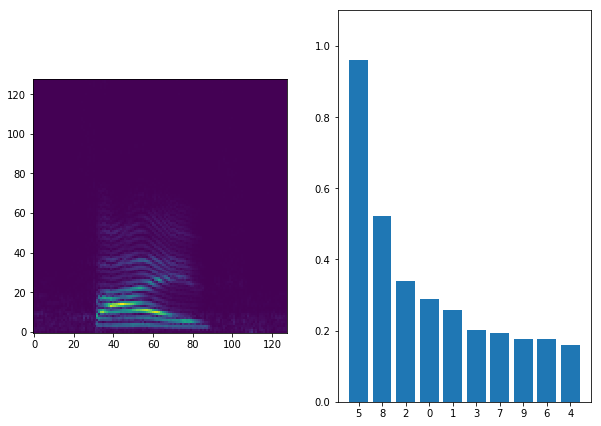

In [11]:
snd, fs = sf.read("./tmp/query.flac")
Audio(snd, rate=fs)

demo_query(snd)

## Keras Model without Optimizer for Project Gradient Decent Attack

In [12]:
def cnn_tf_model(custom_input_tensor):
    # create model
    model = Sequential()
    
    model.add(InputLayer(input_tensor=custom_input_tensor,
                     input_shape=(None, 1, 128, 128)))
    
    model.add(Conv2D(32, (3, 3), data_format = 'channels_first'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation("sigmoid"))

    return model

## Project Gradient Descent Attack

Setup

Reference: Anish Athalye's Guide to Synthesizing Adversarial Examples (https://www.anishathalye.com/2017/07/25/synthesizing-adversarial-examples/)

In [14]:
# Setup Tensorflow Session
sess = tf.InteractiveSession()

# Setup Keras CNN Model with trained weights (no optimizer)
custom_input_tensor = tf.placeholder(tf.float32, shape=(None, 1, 128, 128))
image = tf.Variable(tf.zeros((1, 1, 128, 128)))
cnn_model = cnn_tf_model(image)
cnn_model.load_weights('./checkpoints/cnn2_checkpoint_complete')

# Load Keras model as Tensorflow
output_tensor = cnn_model.output

# Source: Anish Athalye's Guide to Synthesizing Adversarial Examples (https://www.anishathalye.com/2017/07/25/synthesizing-adversarial-examples/)
x_tf = tf.placeholder(tf.float32, (1, 1, 128, 128))
x_hat = image # our trainable adversarial input
assign_op = tf.assign(x_hat, x_tf)

learning_rate = tf.placeholder(tf.float32, ())
y_hat = tf.placeholder(tf.int32, ())

labels = tf.one_hot(y_hat, 10)

loss = tf.nn.softmax_cross_entropy_with_logits(logits=output_tensor, labels=[labels])
optim_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, var_list=[x_hat])

# Project and Clip
epsilon = tf.placeholder(tf.float32, ())

below = x_tf - epsilon
above = x_tf + epsilon
projected = tf.clip_by_value(tf.clip_by_value(x_hat, below, above), 0, 1)
with tf.control_dependencies([projected]):
    project_step = tf.assign(x_hat, projected)
    
model = cnn2_model()
model.load_weights('./checkpoints/cnn2_checkpoint_complete')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Adversarial Attack

In [66]:
def aa(img, target = 5, aa_epsilon = 0.0005, aa_lr = 0.1, aa_steps = 100, verbose=False):
    # Initialization step
    sess.run(assign_op, feed_dict={x_tf: img})

    # Projected gradient descent
    for i in range(aa_steps):
        # Gradient Descent step
        _, loss_value = sess.run([optim_step, loss], feed_dict={learning_rate: aa_lr, y_hat: target})
        
       # Project step
        sess.run(project_step, feed_dict={x_tf: img, epsilon: aa_epsilon})
        if verbose and (i+1) % 10 == 0:
            print('step %d, loss=%g' % (i+1, loss_value))
        elif (i+1) % 25 == 0:
            print('.')

    adv = x_hat.eval()
    return adv

Display Adversarial Attack Statistics

In [72]:
def show_aa(adv, snd, fs, IDX):

    test_images = np.array([adv])
    test_labels = np.array([y[IDX]])
    test_images = test_images.reshape(test_images.shape[0], 1, 128, 128).astype('float32')
    
    # Create prediction
    predictions = model.predict(test_images)
    
    img = test_images[0][0]
    target_class = None
    correct_class = test_labels[0]

    # Display image (source: Anish Athalye)
    plt.figure();
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.sca(ax1)
    p = predictions[0]
    ax1.imshow(img, origin='lower')
    fig.sca(ax1)

    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)
    
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')

    tidigit_labels = ['0','1','2','3','4','5','6','7','8','9']

    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10), [tidigit_labels[i][:15] for i in topk])
    fig.subplots_adjust(bottom=0.2)
    
    print("Predicted: " + str(tidigit_labels[topk[0]]))

    return Audio(snd, rate=fs);

Convert adversarial image to Audio Signal

In [70]:
def adv_to_snd(adv, snd, fs, plot=True):
    # STFT on original signal
    f_, t_, snd_stft = sp.signal.stft(snd, fs=fs)
    snd_stft_zp = np.zeros((128, 128), dtype='complex128')
    snd_stft_zp[:128, :snd_stft.shape[1]-20] = snd_stft[:128, 20:20+128]

    adv = np.reshape(adv, (128, 128))
    
    # Transfer Phase Information
    adv = fmp.transfer_phase(adv, snd_stft_zp)

    # Prepare Adv spectrogram for Inverse STFT
    adv_spec = np.zeros((129, 128), dtype='complex128')
    adv_spec[:128, :128] = adv

    adv_delta = adv - snd_stft_zp
    
    # Apply Inverse STFT
    adv_t, adv_snd = sp.signal.istft(adv_delta, fs=fs)
    adv_total_t, adv_total_snd = sp.signal.istft(adv, fs=fs)
    
    if plot:
        plt.figure()
        fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
        axs[0].imshow(np.abs(adv), origin='lower')
        axs[1].imshow(np.abs(snd_stft_zp), origin='lower')
        axs[2].imshow(np.abs(adv_delta), origin='lower');
        
        axs[0].set_xlabel("Adversarial")
        axs[1].set_xlabel("Original")
        axs[2].set_xlabel("Noise Only")
        
        plt.figure()
        plt.plot(adv_snd)
        plt.plot(snd);

    return adv_snd, adv_total_snd

## Adversarial Attack Demo

In [71]:
@interact(IDX=widgets.IntSlider(min=0,max=len(x),step=1,value=10), target=(0,10))
def demo_aa(IDX=np.random.randint(0, len(x)), target = 5):
    # Load image
    img = x[IDX]
    print("IDX:       " + str(IDX))
    print("\nLabel:     " + str(y[IDX]))
    
    # Load original audio
    snd, fs = sf.read(paths[IDX])
    
    # Adversarial Attack
    img = np.reshape(img, (1, 1, 128, 128))
    adv = aa(img, target)
    
    show_aa(adv, snd, fs, IDX);
    
    # Regenerate Adversarial Signal
    adv_snd, adv_total_snd = adv_to_snd(adv, snd, fs);
    
    print("\nOriginal sample: ")
    display(Audio(snd, rate=fs, norm=False));
    
    print("Adversarial sample: ")
    display(Audio(adv_total_snd, rate=fs, norm=False));
    
    print("Noise only: ")
    display(Audio(adv_snd, rate=fs, norm=False));
    

interactive(children=(IntSlider(value=10, description='IDX', max=6520), IntSlider(value=5, description='target…